# ENGR421
## HW 3
### ATA SAYIN, 64437

## Importing 

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def safelog(x):
    return(np.log(x + 1e-100))

## Data Organization 

In [34]:
data_set_x=np.genfromtxt("hw02_data_set_images.csv",delimiter=",")
data_set_y=np.genfromtxt("hw02_data_set_labels.csv",delimiter=",",dtype=np.str )

In [35]:
df=pd.DataFrame(data_set_y)
labelencoder = LabelEncoder()
df = labelencoder.fit_transform(df)
data_set_y=np.array(df)+1
data_set_y

/Users/as/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [36]:
ntrain=int(data_set_x.shape[0]*25/39)
ntest=int(data_set_x.shape[0]*14/39)
D=data_set_x.shape[1]
K=5

In [37]:
xtrain=np.vstack([data_set_x[39*i:25+39*i] for i in range(K)])
xtest=np.vstack([data_set_x[25+39*i:39+39*i] for i in range(K)])
xtrain.shape

(125, 320)

In [38]:
ytrain=np.concatenate([data_set_y[39*i:25+39*i] for i in range(K)])
ytest=np.concatenate([data_set_y[25+39*i:39+39*i] for i in range(K)])
ytrain.shape

(125,)

In [39]:
xtrain=np.vstack([data_set_x[39*i:25+39*i] for i in range(K)])
xtest=np.vstack([data_set_x[25+39*i:39+39*i] for i in range(K)])
xtrain.shape

(125, 320)

In [40]:
Y_train = np.zeros((ntrain, K)).astype(int)
Y_train[range(ntrain), ytrain - 1] = 1

Y_test = np.zeros((ntest, K)).astype(int)
Y_test[range(ntest), ytest - 1] = 1
Y_test.shape

(70, 5)

## Finding PCD's and Priors

In [41]:
pdc=np.stack([np.mean(xtrain[i*25:25+25*i],axis=0) for i in range(K)])
print(pdc[0,])
print("-----")
print(pdc[1,])
print("-----")
print(pdc[2,])
print("-----")
print(pdc[3,])
print("-----")
print(pdc[4,])
print("-----")

[0.   0.   0.   0.04 0.04 0.04 0.16 0.2  0.16 0.12 0.12 0.24 0.2  0.28
 0.36 0.44 0.48 0.56 0.52 0.4  0.   0.04 0.08 0.12 0.16 0.16 0.28 0.28
 0.32 0.48 0.56 0.64 0.72 0.76 0.88 0.96 1.   0.92 0.76 0.6  0.   0.04
 0.12 0.24 0.28 0.28 0.36 0.44 0.52 0.68 0.8  0.8  0.8  0.88 1.   1.
 0.92 0.8  0.76 0.4  0.04 0.16 0.16 0.28 0.44 0.56 0.68 0.76 0.76 0.8
 0.76 0.88 0.92 0.92 0.8  0.72 0.68 0.56 0.32 0.2  0.08 0.24 0.36 0.36
 0.56 0.64 0.6  0.68 0.68 0.64 0.76 0.8  0.8  0.64 0.48 0.4  0.28 0.12
 0.   0.   0.16 0.36 0.44 0.6  0.64 0.72 0.56 0.52 0.48 0.44 0.6  0.68
 0.68 0.52 0.4  0.2  0.08 0.   0.   0.   0.32 0.52 0.64 0.64 0.56 0.56
 0.4  0.44 0.32 0.44 0.44 0.56 0.64 0.52 0.44 0.12 0.08 0.   0.   0.
 0.36 0.64 0.76 0.56 0.56 0.52 0.4  0.4  0.32 0.28 0.36 0.52 0.6  0.44
 0.32 0.16 0.16 0.   0.   0.   0.48 0.8  0.76 0.64 0.44 0.36 0.28 0.16
 0.2  0.24 0.32 0.48 0.6  0.52 0.4  0.2  0.16 0.   0.   0.   0.6  0.84
 0.84 0.72 0.52 0.4  0.32 0.28 0.32 0.28 0.24 0.52 0.56 0.52 0.4  0.2
 0.12 0.   0

In [42]:
class_priors_train=np.mean(Y_train,axis=0)
class_priors_train

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [43]:
class_priors_test=np.mean(Y_test,axis=0)
class_priors_test

array([0.2, 0.2, 0.2, 0.2, 0.2])

## Ploting PCD's


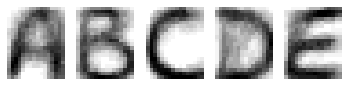

In [44]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.imshow(pdc[0,].reshape(16,20).T,cmap='binary')
ax1.axis('off')
ax2.imshow(pdc[1,].reshape(16,20).T,cmap='binary')
ax2.axis('off')
ax3.imshow(pdc[2,].reshape(16,20).T,cmap='binary')
ax3.axis('off')
ax4.imshow(pdc[3,].reshape(16,20).T,cmap='binary')
ax4.axis('off')
ax5.imshow(pdc[4,].reshape(16,20).T,cmap='binary')
ax5.axis('off')
plt.show()

## Naive Bayes Classifier

In [45]:
p0=safelog(pdc[0,])
p1=safelog(pdc[1,])
p2=safelog(pdc[2,])
p3=safelog(pdc[3,])
p4=safelog(pdc[4,])

p=np.array([p0,p1,p2,p3,p4]).T
n_p=np.array([safelog(1-pdc[0,]),safelog(1-pdc[1,]),safelog(1-pdc[2,]),safelog(1-pdc[3,]),safelog(1-pdc[4,])]).T

In [46]:
y_hat=np.matmul(xtrain,p)+np.matmul(1-xtrain,n_p)+np.array(np.repeat(class_priors_train[None,:],125,axis=0))
y_hat.shape

(125, 5)

## Confusion Matrix

In [47]:
y_predicted = np.argmax(y_hat, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, ytrain, rownames = ['y_pred'], colnames = ['y_train'])
print(confusion_matrix)

y_train   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  24   1   0   1
3         0   0  24   0   0
4         0   1   0  25   0
5         0   0   0   0  24


In [48]:
y_hat=np.matmul(xtest,p)+np.matmul(1-xtest,n_p)+np.array(np.repeat(class_priors_test[None,:],70,axis=0))
y_hat.shape

(70, 5)

In [49]:
y_predicted = np.argmax(y_hat, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, ytest, rownames = ['y_pred'], colnames = ['y_train'])
print(confusion_matrix)

y_train  1   2  3   4   5
y_pred                   
1        7   0  0   0   0
2        0  11  3   2   4
3        0   0  7   0   0
4        7   3  3  12   0
5        0   0  1   0  10
